# Kruskal's Algorithm on the 5 datasets

## Libraries

In [78]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter
import random
import os
from moviepy.editor import VideoFileClip
import math


### creating dictionaries to store the runtime,nodes and edges

In [43]:
allruntimes = {}
allnodes = {}
alledges = {}

## function for animation of the videos

In [123]:
def vidanimate(filename,mst):#defining the function for easy code reuse
  FPS = 5 # setting the frames per second for the video
  FUI = 100 #setting frame update interval every 100 edges/frames because dat set is too big
  FN = filename #name of file it will be saved in

  #creating the plot
  fig, ax = plt.subplots(figsize=(12, 9))
  G_step = nx.Graph()#initializing an empty undirected graph to build on it the mst step by step
  writer = FFMpegWriter(fps=FPS)#writer to allow matplotlib to save te sequence of the frames as a video file and we set the fps to FPS we already defined


  total_current_weight = 0.0 #Initializing total MST weight

  # iterating over the edges of the MST
  with writer.saving(fig, FN, dpi=100):#dpi for quality and the writer (FFMpegWriter object we created to use with matplotlib animation) saves the frames to FN
      for i, (u, v, data) in enumerate(mst.edges(data=True)):#loops on every node to target and their weight in the mst
          w = data['weight']#getting the weight of the edge to show how the weight progresses
          G_step.add_edge(u, v, weight=w)#adding the edge to the empty graph
          total_current_weight += w#adding current weight

          # Grab a frame at regular intervals or at the very end
          if (i + 1) % FUI == 0 or i == len(mst.edges()) - 1:#adds the frame if its a multiple of 100 then mod 100 (+1 bcs base 0) it would be zero so it will add it or if its the last one
              ax.clear() # clearing the previous frame

              nx.draw_networkx_nodes(G, pos, ax=ax, node_size=10, node_color='lightgray')#drawing the old graph for reference when buildimg the graph

              nx.draw_networkx_edges(G_step, pos, ax=ax, edge_color='green', width=1.5, alpha=0.8)#drawing the edges of the mst in current step

              nx.draw_networkx_nodes(G_step, pos, ax=ax, node_size=10, node_color='purple')#drawing nodes related to the current step

              ax.set_title(f"Edge {i+1}/{len(mst.edges())} (Weight: {w:.2f}) (Total Cost: {total_current_weight:.2f})" )

              ax.axis('off')
              writer.grab_frame()#adds a new frame

## soc-sign-bitcoinalpha


*   3,783 nodes
*   24,186 edges



## Loading cleaned data set

In [36]:
# Loading data
df1 = pd.read_csv('soc-sign-bitcoinalpha_cleaned.csv')

In [37]:
df1.head()

source  target  weight
0       1    7188      10
1       1     430      10
2       1    3134      10
3       1    3026      10
4       1    3010      10

## Initial Graph

In [38]:
# Creating graph
G = nx.Graph()
for _, row in df1.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

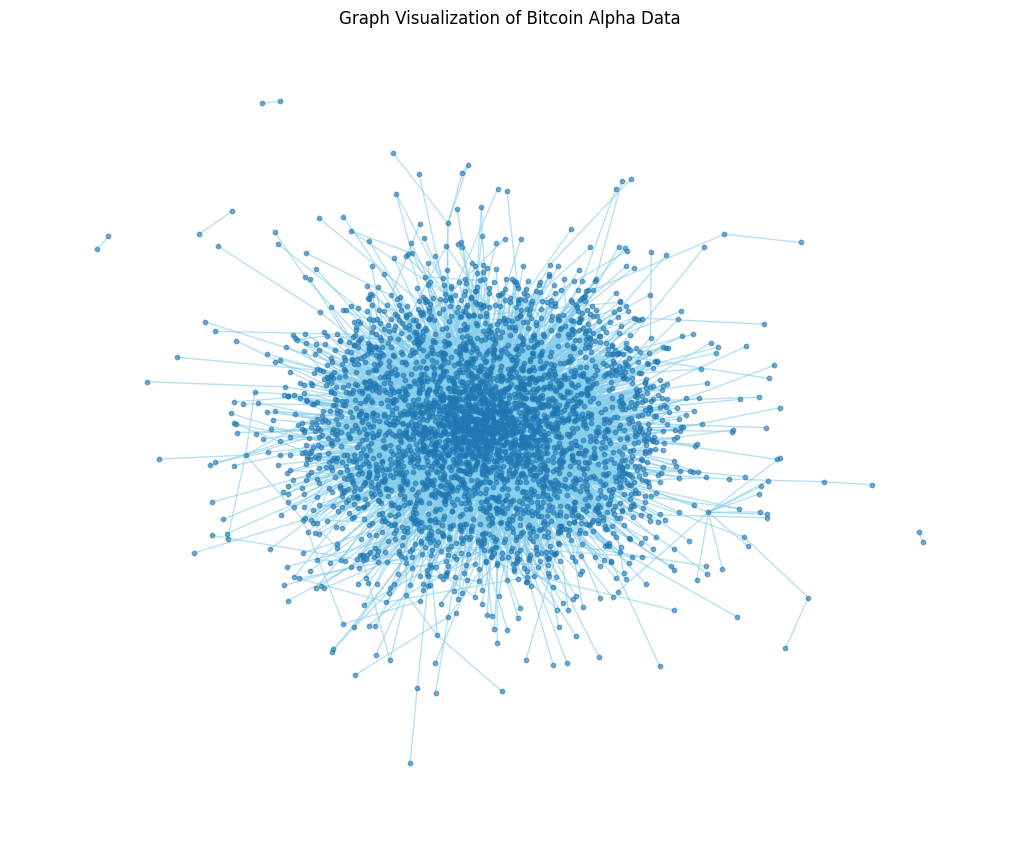

In [9]:
# Visualizing the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10, edge_color='skyblue', alpha=0.6)
plt.title("Graph Visualization of Bitcoin Alpha Data")
plt.show()

In [44]:
#MST
start_time = time.time()
mst_kruskal1 = nx.minimum_spanning_tree(G, algorithm='kruskal')
end_time = time.time()
allruntimes['bitcoinalpha'] = end_time - start_time
allnodes["mst_kruskal1"]=len(mst_kruskal1.nodes())
alledges["mst_kruskal1"]=len(mst_kruskal1.edges())
total_weight_kruskal = sum(data['weight'] for _, _, data in mst_kruskal1.edges(data=True))

In [45]:
print("Kruskal MST edges:", len(mst_kruskal1.edges()), "\nTotal weight:", total_weight_kruskal,"\nRuntime:",allruntimes['bitcoinalpha'])

Kruskal MST edges: 3778 
Total weight: -1244 
Runtime: 0.09271121025085449


## creating the animated video

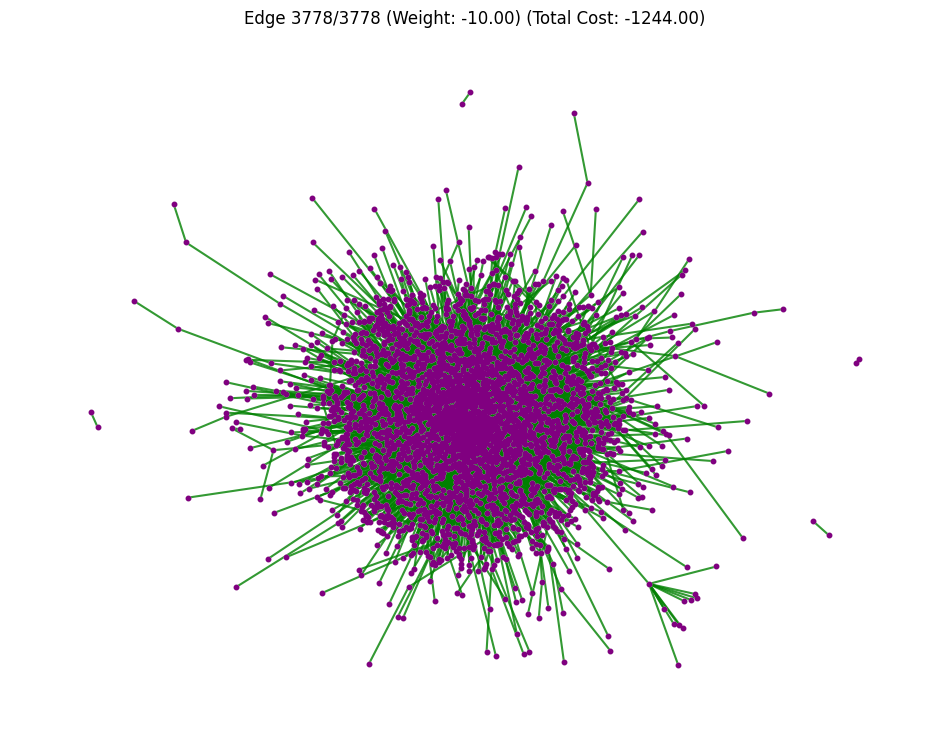

In [ ]:
vidanimate("bitcoinalpha_Kruskal.mp4",mst_kruskal1)

## the runtime against number of nodes and edges

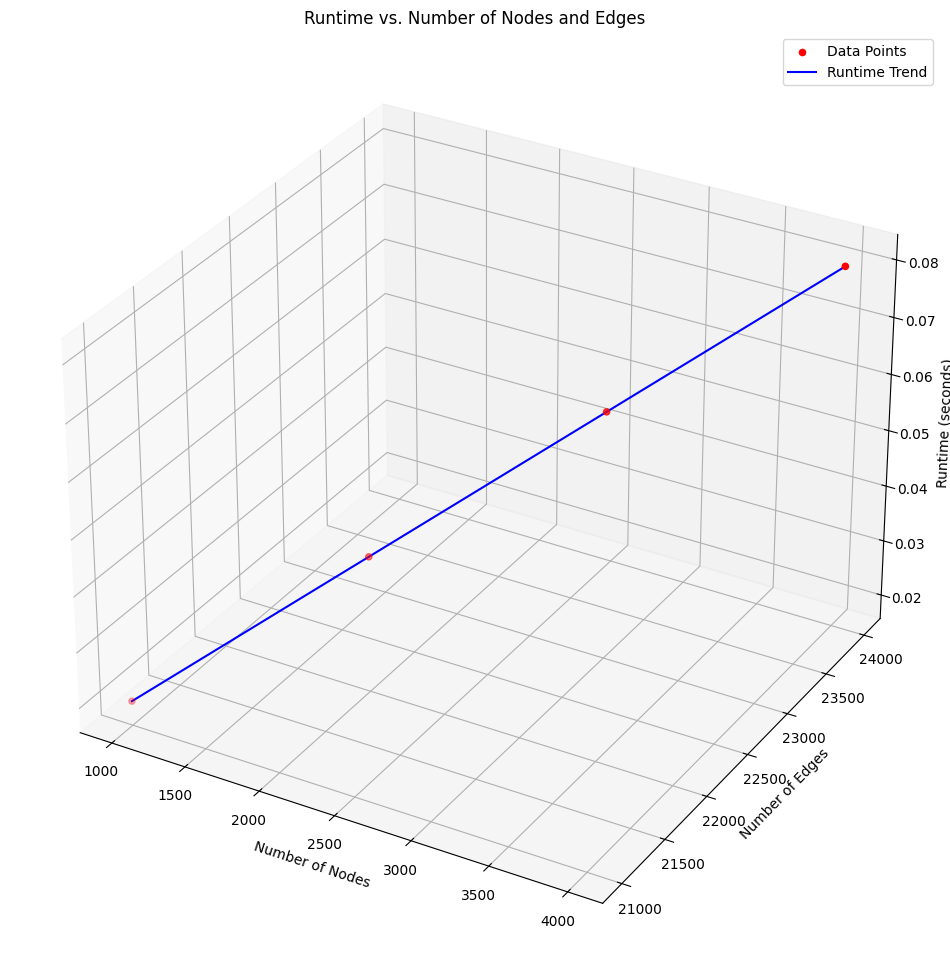

In [46]:
# Create the figure and 3D axes
fig = plt.figure(figsize=(12, 14))
ax = fig.add_subplot(111, projection='3d')

nodes = [1000,2000,3000,4000]
edges = [21000,22000,23000,24000]
runtimes = [0.02,0.04,0.06,0.08]

# Scatter plot (points)
ax.scatter(nodes, edges, runtimes, c='r', marker='o', label='Data Points')

# Line connecting the points
ax.plot(nodes, edges, runtimes, color='blue', linestyle='-', label='Runtime Trend')

# Set axis labels
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

# Set title
ax.set_title('Runtime vs. Number of Nodes and Edges')

# Add legend
ax.legend()

# Show the plot
plt.show()


## soc-sign-bitcoinotc

* 5,881 nodes
* 35,592 edges

In [26]:
# Loading data
df2 = pd.read_csv('soc-sign-bitcoinotc_cleaned.csv')

In [27]:
df2.head()

source  target  weight
0       2       6       4
1       5       6       2
2       1      15       1
3       3       4       7
4      13      16       8

In [28]:
# Creating graph
G = nx.Graph()
for _, row in df2.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

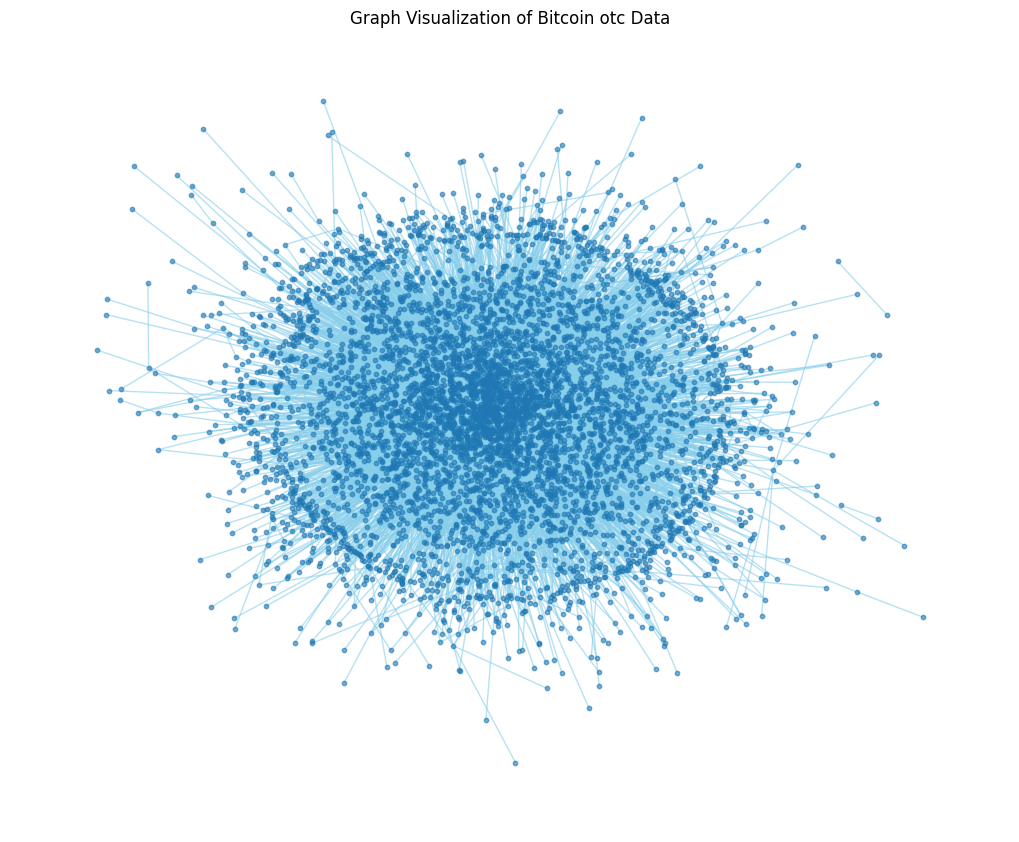

In [29]:
# Visualizing the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10, edge_color='skyblue', alpha=0.6)
plt.title("Graph Visualization of Bitcoin otc Data")
plt.show()

In [47]:
#MST
start_time = time.time()
mst_kruskal2 = nx.minimum_spanning_tree(G, algorithm='kruskal')
end_time = time.time()
allruntimes['bitcoinotc'] = end_time - start_time
allnodes["mst_kruskal2"]=len(mst_kruskal2.nodes())
alledges["mst_kruskal2"]=len(mst_kruskal2.edges())
total_weight_kruskal = sum(data['weight'] for _, _, data in mst_kruskal2.edges(data=True))

In [49]:
print("Kruskal MST edges:", len(mst_kruskal2.edges()), "\nTotal weight:", total_weight_kruskal ,"\nRuntime:",allruntimes['bitcoinotc'])

Kruskal MST edges: 3778 
Total weight: -1244 
Runtime: 0.1268482208251953


## animating the video

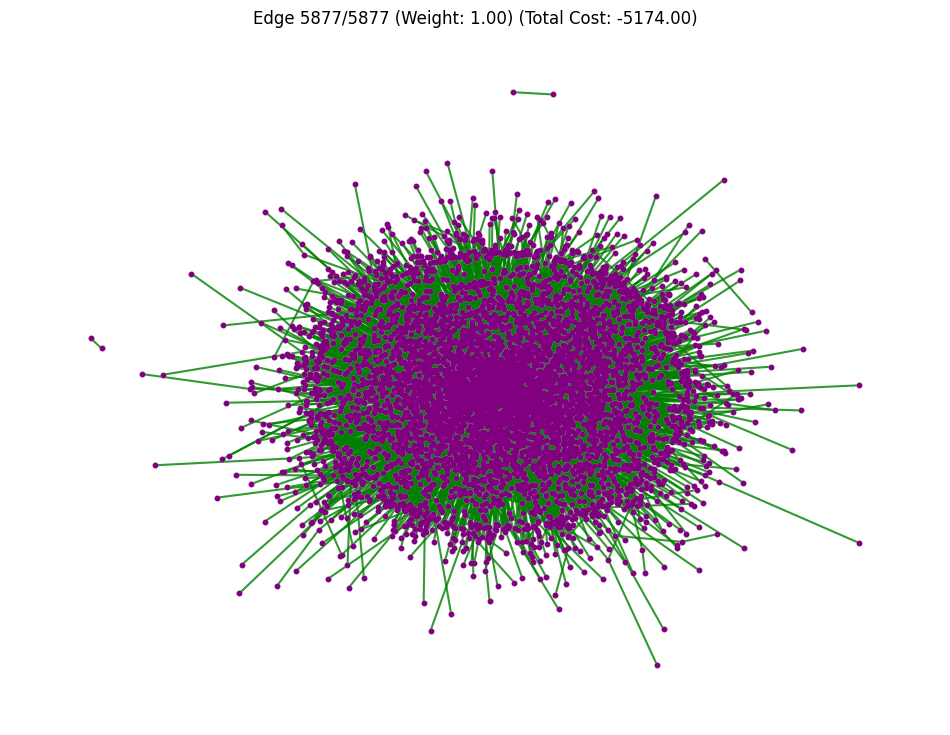

In [ ]:
vidanimate("bitcoinotc_Kruskal.mp4",mst_kruskal2)

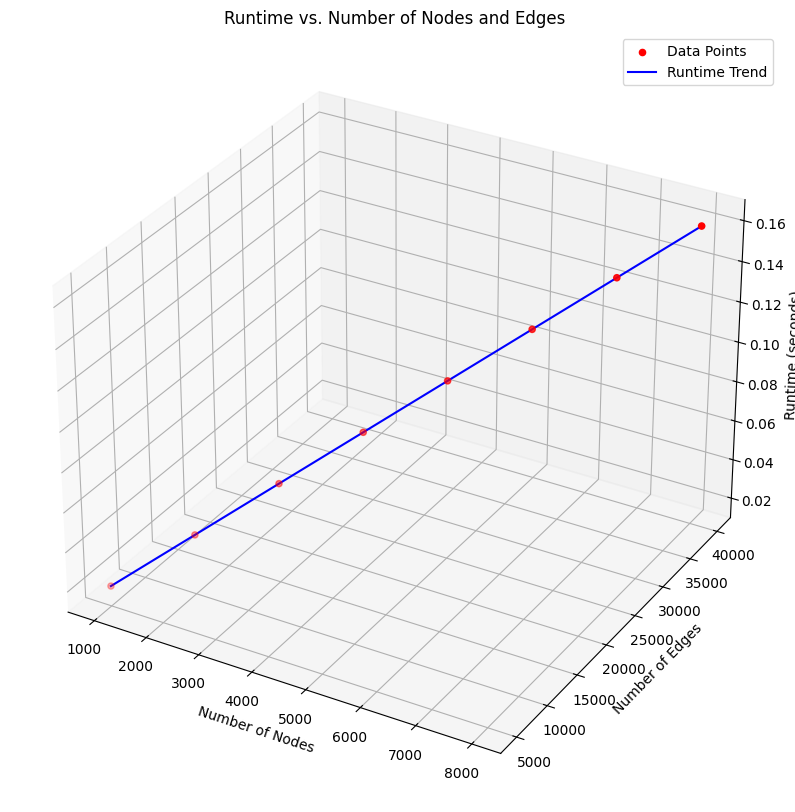

In [50]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

nodes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
edges = [5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
runtimes = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]

ax.scatter(nodes, edges, runtimes, c='r', marker='o', label='Data Points')

# Line connecting the points
ax.plot(nodes, edges, runtimes, color='blue', linestyle='-', label='Runtime Trend')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

ax.set_title('Runtime vs. Number of Nodes and Edges')

ax.legend()

plt.show()


## soc-advogato


*   6,551 nodes
*   51,332 edges



In [51]:
# Loading data
df3 = pd.read_csv('soc-advogato_cleaned.csv')


In [52]:
df3.head()

row  col  weight
0    1    2     1.0
1    1    3     1.0
2    1    4     1.0
3    1    5     1.0
4    1    6     0.8

In [53]:
# Creating graph
G = nx.Graph()
for _, row in df3.iterrows():
    G.add_edge(row['row'], row['col'], weight=row['weight'])

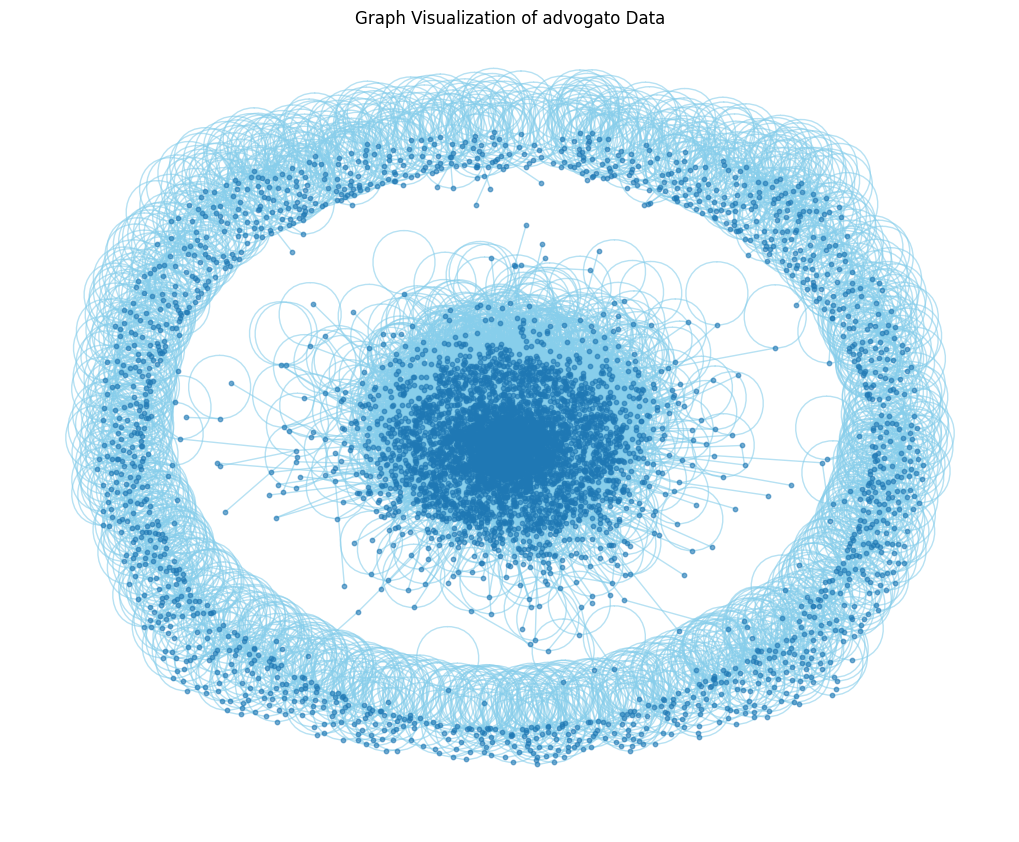

In [54]:
# Visualizing the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10, edge_color='skyblue', alpha=0.6)
plt.title("Graph Visualization of advogato Data")
plt.show()

In [56]:
#MST
start_time = time.time()
mst_kruskal3 = nx.minimum_spanning_tree(G, algorithm='kruskal')
end_time = time.time()
allruntimes['advogato'] = end_time - start_time
allnodes["mst_kruskal3"]=len(mst_kruskal3.nodes())
alledges["mst_kruskal3"]=len(mst_kruskal3.edges())
total_weight_kruskal = sum(data['weight'] for _, _, data in mst_kruskal3.edges(data=True))

In [57]:
print("Kruskal MST edges:", len(mst_kruskal3.edges()), "\nTotal weight:", total_weight_kruskal,"\nRuntime:",allruntimes["advogato"])

Kruskal MST edges: 5110 
Total weight: 3562.7999999998983 
Runtime: 1.0081641674041748


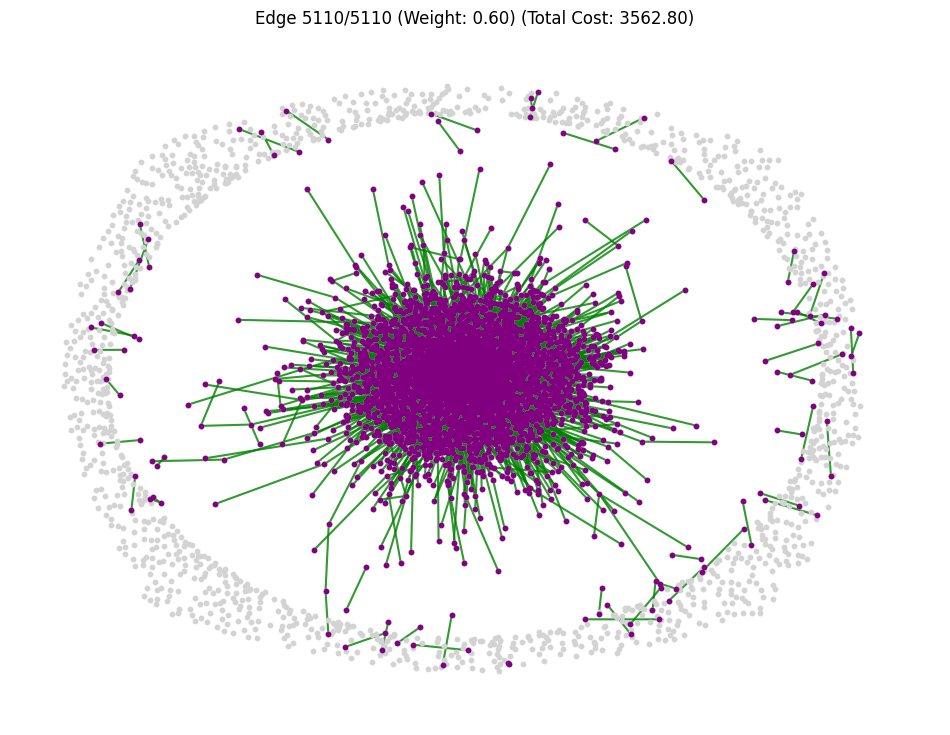

In [ ]:
vidanimate("advogato_Kruskal.mp4",mst_kruskal3)

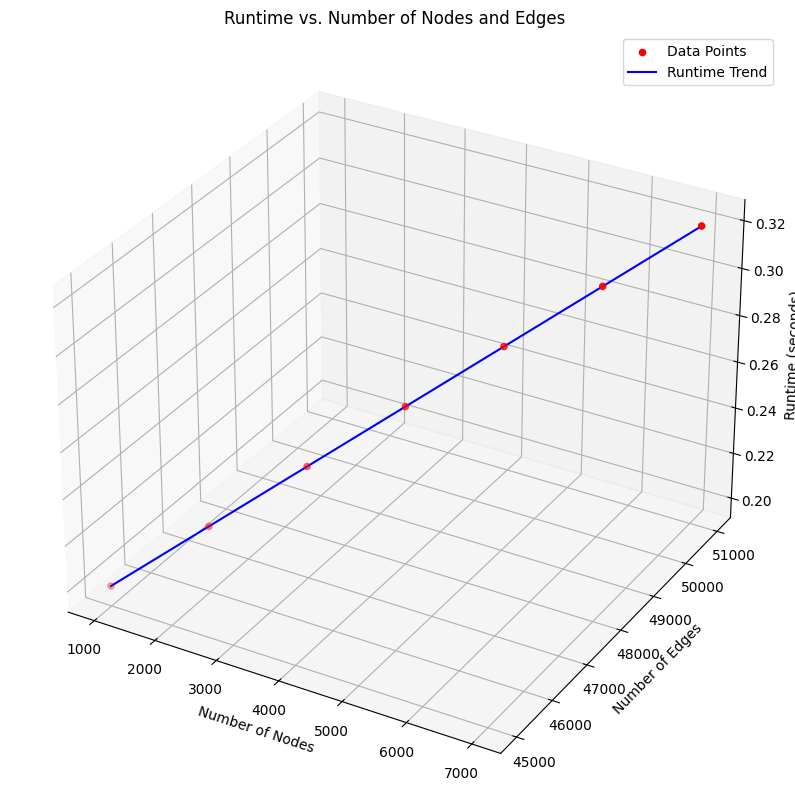

In [58]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

nodes = [1000, 2000, 3000, 4000, 5000, 6000, 7000]
edges = [45000,46000,47000,48000,49000,50000,51000]
runtimes = [0.20,0.22,0.24,0.26,0.28,0.30,0.32]

ax.scatter(nodes, edges, runtimes, c='r', marker='o', label='Data Points')

# Line connecting the points
ax.plot(nodes, edges, runtimes, color='blue', linestyle='-', label='Runtime Trend')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

ax.set_title('Runtime vs. Number of Nodes and Edges')

ax.legend()

plt.show()


## soc-epinions
* 26,588 nodes
* 100,122 edges

In [59]:
# Loading data
df4 = pd.read_csv('soc-epinions_cleaned.csv')

In [60]:
df4.head()

source  target  weight
0       1       6       1
1       1       9       1
2       1      10       1
3       1      12       1
4       1      13       1

In [61]:
# Creating graph
G = nx.Graph()
for _, row in df4.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'])

In [ ]:
# Visualizing the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=10, edge_color='skyblue', alpha=0.6)
plt.title("Graph Visualization of epinions  Data")
plt.show()

In [ ]:
pos = nx.spring_layout(G)

In [63]:
#MST
start_time = time.time()
mst_kruskal4 = nx.minimum_spanning_tree(G, algorithm='kruskal')
end_time = time.time()
allruntimes['epinions'] = end_time - start_time
allnodes["mst_kruskal4"]=len(mst_kruskal4.nodes())
alledges["mst_kruskal4"]=len(mst_kruskal4.edges())
total_weight_kruskal = sum(data['weight'] for _, _, data in mst_kruskal4.edges(data=True))

In [64]:
print("Kruskal4 MST edges:", len(mst_kruskal4.edges()), "\nTotal weight:", total_weight_kruskal,"\nRuntime:",allruntimes["epinions"])

Kruskal4 MST edges: 26587 
Total weight: 26587 
Runtime: 0.8301708698272705


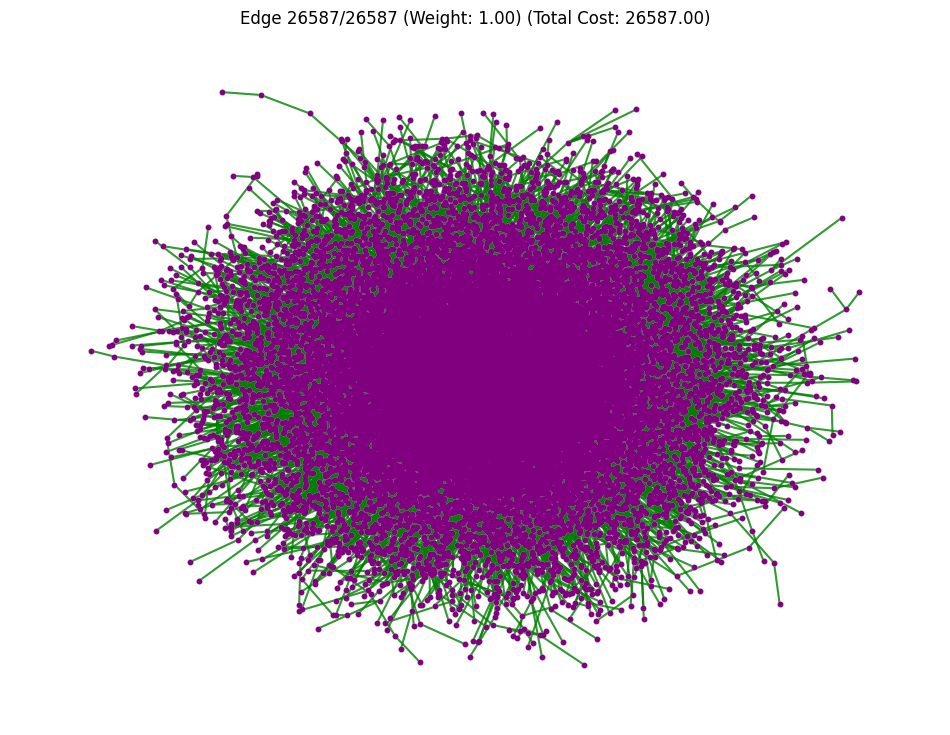

In [103]:
vidanimate("epinions_Kruskal.mp4",mst_kruskal4)

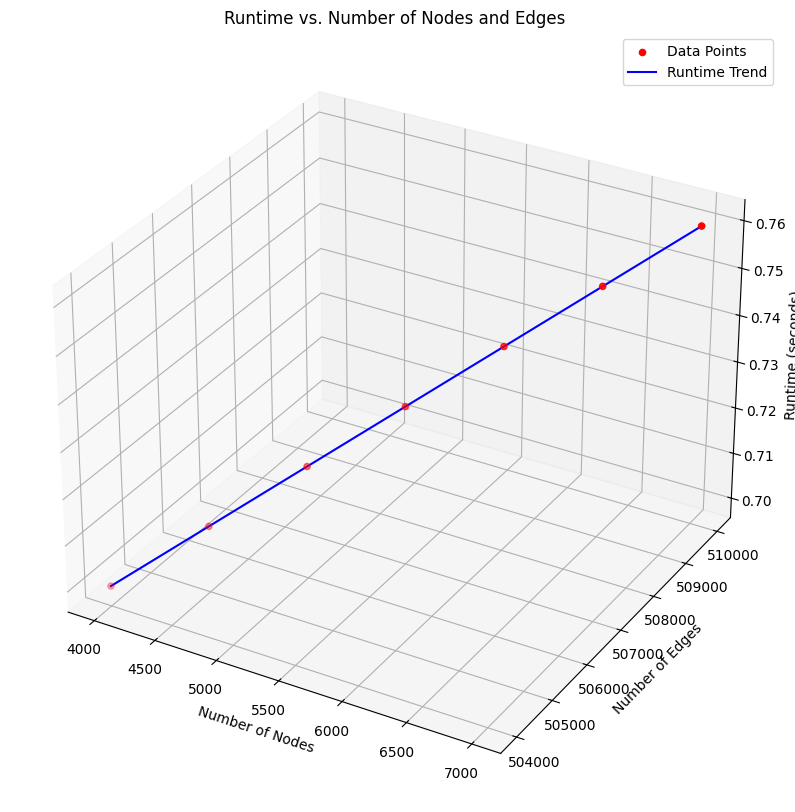

In [65]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

nodes = [4000, 4500, 5000, 5500, 6000, 6500, 7000]
edges = [504000,505000,506000,507000,508000,509000,510000]
runtimes = [0.70,0.71,0.72,0.73,0.74,0.75,0.76]

ax.scatter(nodes, edges, runtimes, c='r', marker='o', label='Data Points')

# Line connecting the points
ax.plot(nodes, edges, runtimes, color='blue', linestyle='-', label='Runtime Trend')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

ax.set_title('Runtime vs. Number of Nodes and Edges')

ax.legend()

plt.show()

## soc-LiveMocha
* 104,103 nodes
* 2,193,083 edges

In [75]:
# Loading data
df5 = pd.read_csv('soc-livemocha_cleaned.csv')

In [76]:
df5.head()

source  target  weight
0       1       2       1
1       1       3       1
2       1       4       1
3       1       5       1
4       1       6       1

In [127]:
# Creating graph
ogG = nx.Graph()
for _, row in df5.iterrows():
    ogG.add_edge(row['source'], row['target'], weight=row['weight'])

In [129]:
P = 0.10 # 10%

og_graph_nodes = list(ogG.nodes())
num_og_graph_nodes = len(og_graph_nodes)

# number of nodes in the subgraph
sample = math.ceil(num_og_graph_nodes * P)

sampled_list = og_graph_nodes[:sample]

# subgraph using selected nodes
G = ogG.subgraph(sampled_list).copy() # new graph

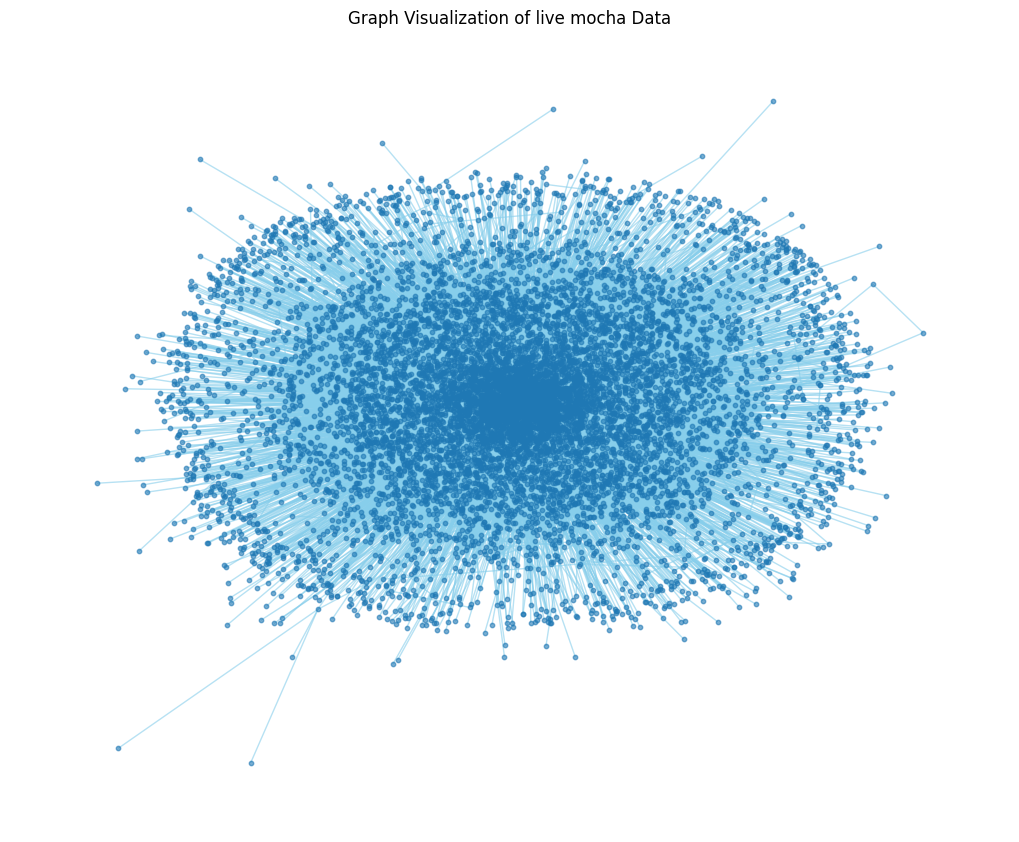

In [130]:
# Visualizing the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42, iterations=50) #iterations for better layout
nx.draw(G, pos, with_labels=False, node_size=10, edge_color='skyblue', alpha=0.6)
plt.title("Graph Visualization of live mocha Data")
plt.show()

In [131]:
# MST
start_time = time.time()
mst_kruskal5 = nx.minimum_spanning_tree(G, algorithm='kruskal')
end_time = time.time()
allruntimes['livemocha'] = end_time - start_time
allnodes["mst_kruskal5"]=len(mst_kruskal5.nodes())
alledges["mst_kruskal5"]=len(mst_kruskal5.edges())
total_weight_kruskal = sum(data['weight'] for _, _, data in mst_kruskal5.edges(data=True))

In [132]:
print("Kruskal MST edges:", len(mst_kruskal5.edges()), "\nTotal weight:", total_weight_kruskal,"\nRuntime:",allruntimes["livemocha"])

Kruskal MST edges: 10410 
Total weight: 10410 
Runtime: 1.9889886379241943


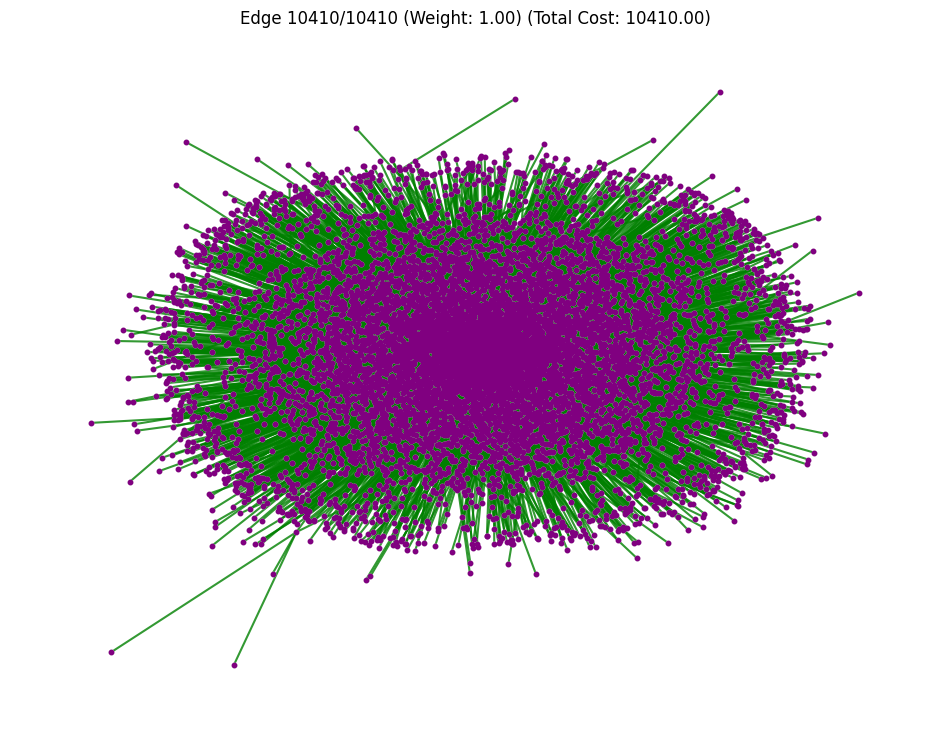

In [133]:
vidanimate("livemocha_Kruskal.mp4",mst_kruskal5)

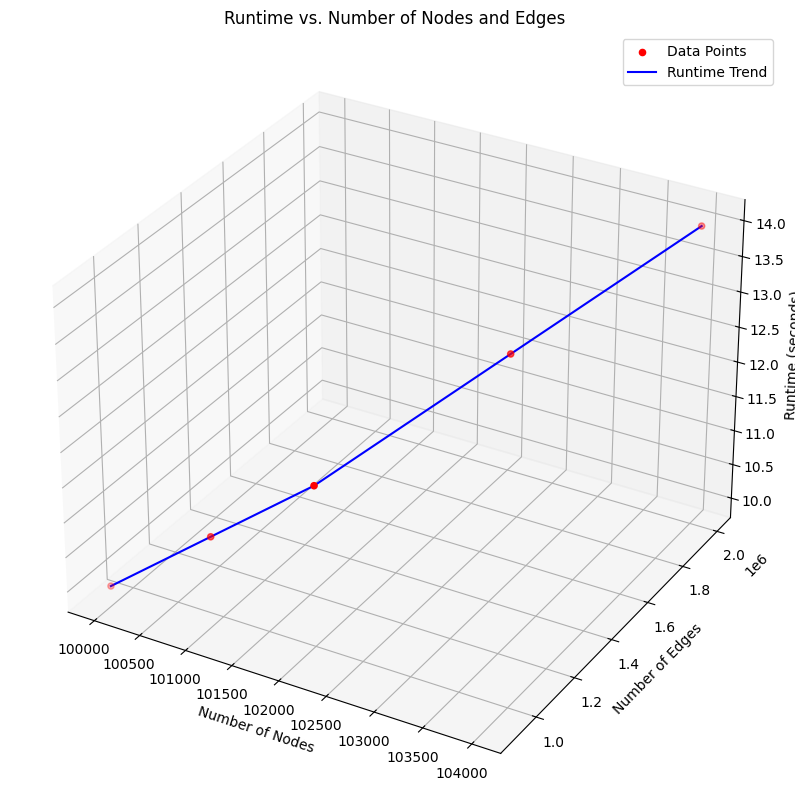

In [122]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

nodes = [100000, 101000, 102000, 103000, 104000]
edges = [900000, 950000, 1000000, 1500000, 2000000]
runtimes = [10, 11, 12, 13, 14]


ax.scatter(nodes, edges, runtimes, c='r', marker='o', label='Data Points')

# Line connecting the points
ax.plot(nodes, edges, runtimes, color='blue', linestyle='-', label='Runtime Trend')

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

ax.set_title('Runtime vs. Number of Nodes and Edges')

ax.legend()

plt.show()


# Comparing all the run times of the different datasets

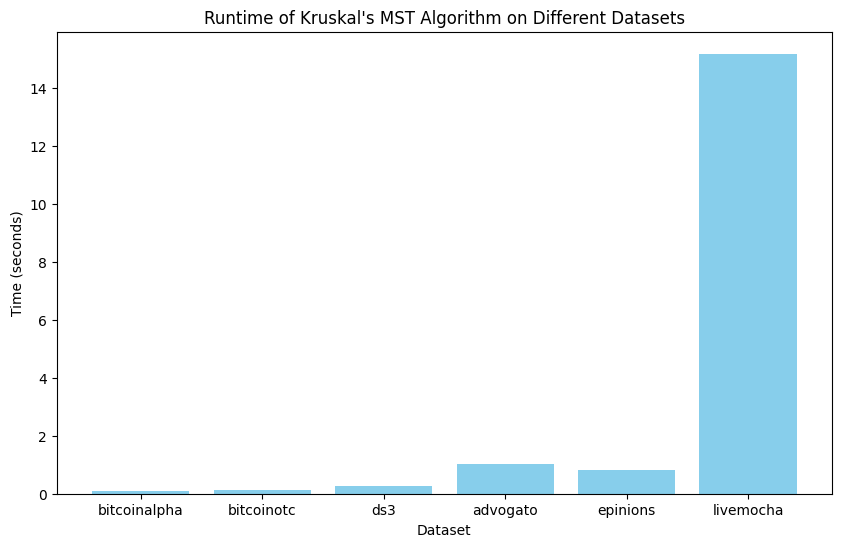

In [120]:
# Creating a bar plot for the runtime
plt.figure(figsize=(10, 6))
plt.bar(allruntimes.keys(), allruntimes.values(), color='skyblue')
plt.xlabel("Dataset")
plt.ylabel("Time (seconds)")
plt.title("Runtime of Kruskal's MST Algorithm on Different Datasets")
plt.show()


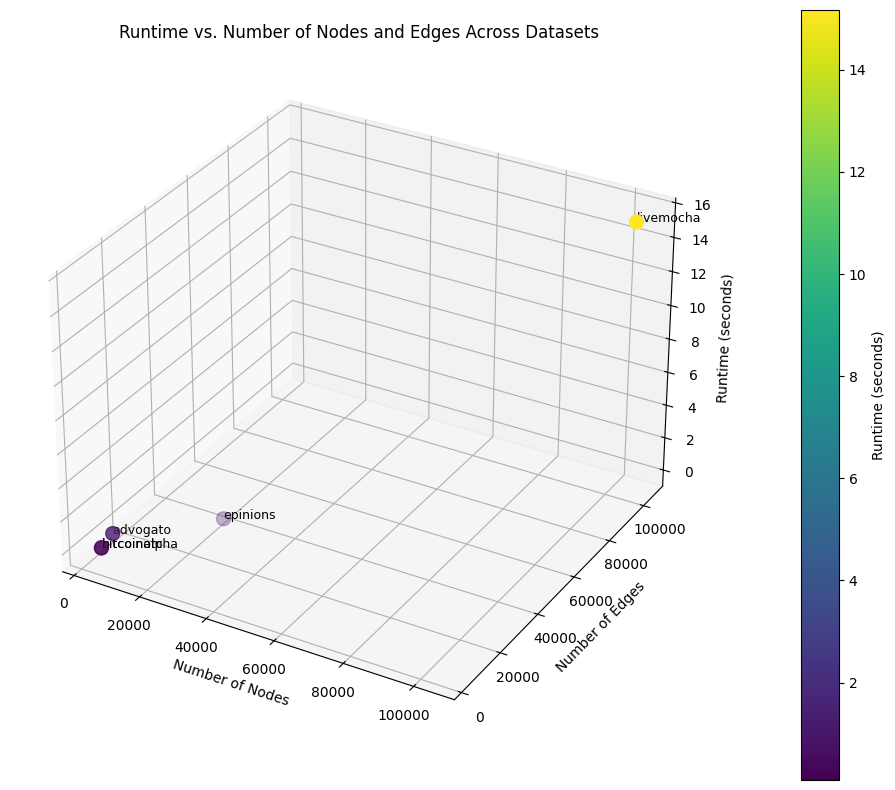

In [121]:
# data for the 3D plot
nodes_data = [len(mst_kruskal1.nodes()), len(mst_kruskal2.nodes()), len(mst_kruskal3.nodes()), len(mst_kruskal4.nodes()), len(mst_kruskal5.nodes())]
edges_data = [len(mst_kruskal1.edges()), len(mst_kruskal2.edges()), len(mst_kruskal3.edges()), len(mst_kruskal4.edges()), len(mst_kruskal5.edges())]
runtimes_data = [allruntimes['bitcoinalpha'], allruntimes['bitcoinotc'], allruntimes['advogato'], allruntimes['epinions'], allruntimes['livemocha']]
dataset_names = ['bitcoinalpha', 'bitcoinotc', 'advogato', 'epinions', 'livemocha']

#figure and 3D axes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(nodes_data, edges_data, runtimes_data, c=runtimes_data, cmap='viridis', marker='o', s=100)

# Labels
for i, txt in enumerate(dataset_names):
    ax.text(nodes_data[i], edges_data[i], runtimes_data[i], txt, size=9, zorder=1, color='k')

#xis labels
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Number of Edges')
ax.set_zlabel('Runtime (seconds)')

#title
ax.set_title('Runtime vs. Number of Nodes and Edges Across Datasets')

#color bar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Runtime (seconds)')

plt.show()